# **Линейные модели. Логистическая регрессия, регуляризация, кривые обучения**

### Линейный классификатор

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. 
Если это можно сделать без ошибок, то обучающая выборка называется *линейно разделимой*.

Мы уже знакомы с линейной регрессией и методом наименьших квадратов. Рассмотрим задачу бинарной классификации, причем метки целевого класса обозначим "+1" (положительные примеры) и "-1" (отрицательные примеры).
Один из самых простых линейных классификаторов получается на основе регрессии вот таким образом:

$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^{\text{T}}\textbf x),$$

где
 - $\textbf{x}$ – вектор признаков примера (вместе с единицей);
 - $\textbf{w}$ – веса в линейной модели (вместе со смещением $w_0$);
 - $\text{sign}(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента;
 - $a(\textbf{x})$ – ответ классификатора на примере $\textbf{x}$.



### Логистическая регрессия как линейный классификатор

Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность $p_+$ отнесения примера $\textbf{x}_\text{i}$ к классу "+":
$$\Large p_+ = \text P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Прогнозирование не просто ответа ("+1" или "-1"), а именно *вероятности* отнесения к классу "+1" во многих задачах является очень важным бизнес-требованием. Например, в задаче кредитного скоринга, где традиционно применяется логистическая регрессия, часто прогнозируют вероятность невозврата кредита ($p_+$). Клиентов, обратившихся за кредитом, сортируют по этой предсказанной вероятности (по убыванию), и получается скоркарта — по сути, рейтинг клиентов от плохих к хорошим.

Банк выбирает для себя порог $p_*$ предсказанной вероятности невозврата кредита и начиная с этого значения уже не выдает кредит. Более того, можно умножить предсказнную вероятность на выданную сумму и получить матожидание потерь с клиента, что тоже будет хорошей бизнес-метрикой.

Итак, мы хотим прогнозировать вероятность $p_+ \in [0,1]$, а пока умеем строить линейный прогноз с помощью МНК: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. Каким образом преобразовать полученное значение в вероятность, пределы которой – [0, 1]? Очевидно, для этого нужна некоторая функция $f: \mathbb{R} \rightarrow [0,1].$ В модели логистической регрессии для этого берется конкретная функция: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$. И сейчас разберемся, каковы для этого предпосылки. 

In [1]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def sigma(z):
    return 1.0 / (1 + np.exp(-z))

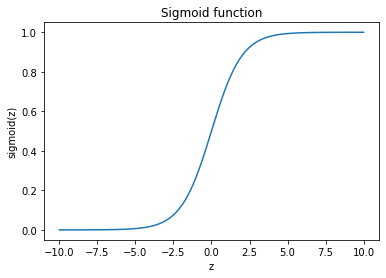

In [3]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx])
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid function");

Обозначим $P(X)$ вероятностью происходящего события $X$. Тогда отношение вероятностей $OR(X)$ определяется из $\frac{P(X)}{1-P(X)}$, а это — отношение вероятностей того, произойдет ли событие или не произойдет. Очевидно, что вероятность и отношение шансов содержат одинаковую информацию. Но в то время как $P(X)$ находится в пределах от 0 до 1, $OR(X)$ находится в пределах от 0 до $\infty$.

Если вычислить логарифм $OR(X)$ (то есть называется логарифм шансов, или логарифм отношения вероятностей), то легко заметить, что $\log{OR(X)} \in \mathbb{R}$. Его то мы и будем прогнозировать с помощью МНК.

Посмотрим, как логистическая регрессия будет делать прогноз $p_+ = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$ (пока считаем, что веса $\textbf{w}$ мы как-то получили (т.е. обучили модель), далее разберемся, как именно). 

**Шаг 1.** Вычислить значение $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (уравнение $\textbf{w}^\text{T}\textbf{x} = 0$ задает гиперплоскость, разделяющую примеры на 2 класса);


**Шаг 2.** Вычислить логарифм отношения шансов: $ \log(OR_{+}) =  \textbf{w}^\text{T}\textbf{x}$.

**Шаг 3.** Имея прогноз шансов на отнесение к классу "+" – $OR_{+}$, вычислить $p_{+}$ с помощью простой зависимости:

$$\Large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} =  \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$


В правой части мы получили как раз сигмоид-функцию.

Итак, логистическая регрессия прогнозирует вероятность отнесения примера к классу "+" (при условии, что мы знаем его признаки и веса модели) как сигмоид-преобразование линейной комбинации вектора весов модели и вектора признаков примера:

$$\Large p_+(x_i) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

Следующий вопрос: как модель обучается. Тут мы опять обращаемся к принципу максимального правдоподобия.

### Принцип максимального правдоподобия и логистическая регрессия
Теперь посмотрим, как из принципа максимального правдоподобия получается оптимизационная задача, которую решает логистическая регрессия, а именно, – минимизация *логистической* функции потерь. 
Только что мы увидели, что логистическая регрессия моделирует вероятность отнесения примера к классу "+" как 

$$\Large p_+(\textbf{x}_\text{i}) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Тогда для класса "-" аналогичная вероятность:
$$\Large p_-(\textbf{x}_\text{i})  = \text{P}\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sigma(-\textbf{w}^\text{T}\textbf{x}_\text{i}) $$

Оба этих выражения можно ловко объединить в одно (следите за моими руками – не обманывают ли вас):

$$\Large \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Выражение $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ называется *отступом* (*margin*) классификации на объекте $\textbf{x}_\text{i}$ (не путать с зазором (тоже margin), про который чаще всего говорят в контексте SVM). Если он неотрицателен, модель не ошибается на объекте $\textbf{x}_\text{i}$, если же отрицателен – значит, класс для $\textbf{x}_\text{i}$  спрогнозирован неправильно. 
Заметим, что отступ определен для объектов именно обучающей выборки, для которых известны реальные метки целевого класса $y_i$.


Рекомендую решить почти классическую задачу из начального курса линейной алгебры: найти расстояние от точки с радиус-вектором $\textbf{x}_A$ до плоскости, которая задается уравнением $\textbf{w}^\text{T}\textbf{x} = 0.$


Ответ: 
$\Large \rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$


Когда получим (или посмотрим) ответ, то поймем, что чем больше по модулю выражение $\textbf{w}^{\text{T}}\textbf{x}_\text{i}$, тем дальше точка $\textbf{x}_\text{i}$ находится от плоскости $\textbf{w}^{\text{T}}\textbf{x} = 0.$

Значит, выражение $M(\textbf{x}_\text{i}) = y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}$ – это своего рода "уверенность" модели в классификации объекта $\textbf{x}_\text{i}$: 

- если отступ большой (по модулю) и положительный, это значит, что метка класса поставлена правильно, а объект находится далеко от разделяющей гиперплоскости (такой объект классифицируется уверенно). На рисунке – $x_3$.
- если отступ большой (по модулю) и отрицательный, значит метка класса поставлена неправильно, а объект находится далеко от разделюящей гиперплоскости (скорее всего такой объект – аномалия, например, его метка в обучающей выборке поставлена неправильно). На рисунке – $x_1$.
- если отступ малый (по модулю), то объект находится близко к разделюящей гиперплоскости, а  знак отступа определяет, правильно ли объект классифицирован.  На рисунке – $x_2$ и $x_4$.

Теперь распишем правдоподобие выборки, а именно, вероятность наблюдать данный вектор $\textbf{y}$ у выборки $\textbf X$. Делаем сильное предположение: объекты приходят независимо, из одного распределения (*i.i.d.*). Тогда

$$\Large \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

где $\ell$ – длина выборки $\textbf X$ (число строк).

Как водится, возьмем логарифм данного выражения (сумму оптимизировать намного проще, чем произведение):

$$\Large  \log \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \log \sum_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})$$

То есть в данном случае принцип максимизации правдоподобия приводит к минимизации выражения 

$$\Large \mathcal{L_{log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}).$$

Это *логистическая* функция потерь, просуммированная по всем объектам обучающей выборки.

Посмотрим на новую фунцию как на функцию от отступа: $L(M) = \log (1 + \exp^{-M})$. Нарисуем ее график, а также график 1/0 функциий потерь (*zero-one loss*), которая просто штрафует модель на 1 за ошибку на каждом объекте (отступ отрицательный): $L_{1/0}(M) = [M < 0]$.

Картинка отражает общую идею, что в задаче классификации, не умея напрямую минимизировать число ошибок (по крайней мере, градиентными методами это не сделать – производная 1/0 функциий потерь в нуле обращается в бесконечность), мы минимизируем некоторую ее верхнюю оценку. В данном случае это логистическая функция потерь (где логарифм двоичный, но это не принципиально), и справедливо 

$$\Large \mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$

где $\mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w})$ – попросту число ошибок логистической регрессии с весами $\textbf{w}$ на выборке $(\textbf X, \textbf{y})$.

То есть уменьшая верхнюю оценку $\mathcal{L_{\log}}$ на число ошибок классификации, мы таким образом надеемся уменьшить и само число ошибок.

### L2-регуляризация логистической функции потерь

$L2-регуляризация$ логистической регрессии устроена почти так же, как и в случае с гребневой (Ridge регрессией). Вместо функционала $\mathcal{L_{\log}} (X, \textbf{y}, \textbf{w})$ минимизируется следующий:

$$\Large J(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

В случае логистической регрессии принято введение обратного коэффициента регуляризации $C = \frac{1}{\lambda}$. И тогда решением задачи будет

$$\Large \widehat{\textbf{w}}  = \arg \min_{\textbf{w}} J(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

Далее рассмотрим пример, позволяющий интуитивно понять один из смыслов регуляризации. 

Посмотрим, как регуляризация влияет на качество классификации на наборе данных по тестированию микрочипов из курса Andrew Ng по машинному обучению. 
Будем использовать логистическую регрессию с полиномиальными признаками и варьировать параметр регуляризации C.
Сначала посмотрим, как регуляризация влияет на разделяющую границу классификатора, интуитивно распознаем переобучение и недообучение.
Потом численно установим близкий к оптимальному параметр регуляризации с помощью кросс-валидации (`cross-validation`) и  перебора по сетке (`GridSearch`). 

In [16]:
from __future__ import division, print_function
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загружаем данные Microchip Tests. В этом наборе данных для 118 микрочипов (объекты) указаны результаты двух тестов по контролю качества (два числовых признака) и сказано, пустили ли микрочип в производство. Признаки уже центрированы, то есть из всех значений вычтены средние по столбцам. Таким образом, "среднему" микрочипу соответствуют нулевые значения результатов тестов. 

In [11]:
data = pd.read_csv(
    "/content/drive/MyDrive/microchip_tests.txt", header=None, names=("test1", "test2", "released")
)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


Посмотрим на первые и последние 5 строк.

In [12]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [13]:
data.tail(5)

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


Сохраним обучающую выборку и метки целевого класса в отдельных массивах NumPy.

In [14]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

Отобразим данные. Красный цвет соответствует бракованным чипам, зеленый – нормальным. 

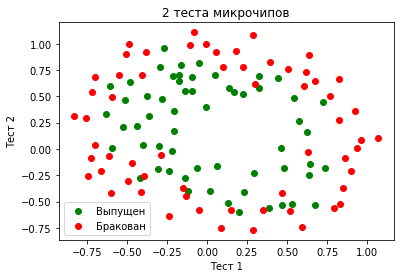

In [17]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="green", label="Выпущен")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Бракован")
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title("2 теста микрочипов")
plt.legend();

Определяем функцию для отображения разделяющей кривой классификатора

In [19]:
def plot_boundary(clf, X, y, grid_step = 0.01, poly_featurizer = None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Полиномиальными признаками до степени $d$ для двух переменных $x_1$ и $x_2$ мы называем следующие:

$$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$

Например, для $d=3$ это будут следующие признаки:

$$\large 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

In [20]:
# Создадим объект `sklearn`, который добавит в матрицу $X$ полиномиальные признаки вплоть до степени 7.

poly = PolynomialFeatures(degree = 7)
X_poly = poly.fit_transform(X)

In [21]:
X_poly.shape

(118, 36)

Доля правильных ответов классификатора на обучающей выборке: 0.627


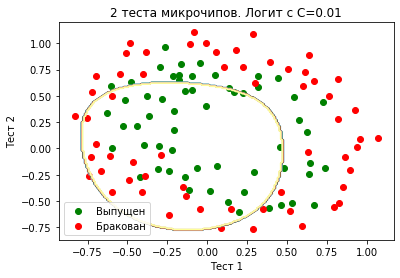

In [22]:
C = 1e-2
logit = LogisticRegression(C = C, n_jobs = -1, random_state = 17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="green", label = "Выпущен")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label = "Бракован")
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title("2 теста микрочипов. Логит с C=0.01")
plt.legend()

print(
    "Доля правильных ответов классификатора на обучающей выборке:",
    round(logit.score(X_poly, y), 3),
)

Доля правильных ответов классификатора на обучающей выборке: 0.831


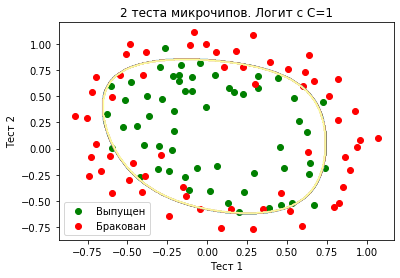

In [23]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="green", label="Выпущен")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Бракован")
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title("2 теста микрочипов. Логит с C=1")
plt.legend()

print(
    "Доля правильных ответов классификатора на обучающей выборке:",
    round(logit.score(X_poly, y), 3),
)

Доля правильных ответов классификатора на обучающей выборке: 0.873


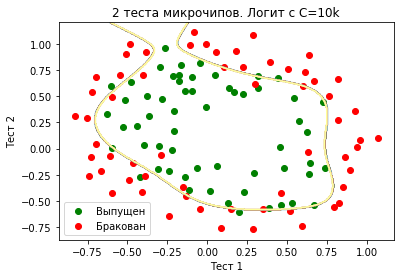

In [24]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=0.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c="green", label="Выпущен")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red", label="Бракован")
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title("2 теста микрочипов. Логит с C=10k")
plt.legend()

print(
    "Доля правильных ответов классификатора на обучающей выборке:",
    round(logit.score(X_poly, y), 3),
)

Чтоб обсудить результаты, перепишем формулу для функционала, который оптимизируется в логистической регрессии, в таком виде:
$$J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

где
 - $\mathcal{L}$ – логистическая функция потерь, просуммированная по всей выборке
 - $C$ – обратный коэффициент регуляризации (тот самый $C$ в `sklearn`-реализации `LogisticRegression`)

**Промежуточные выводы**:
 - чем больше параметр $C$, тем более сложные зависимости в данных может восстанавливать модель (интуитивно $C$ соответствует "сложности" модели (model capacity))
 - если регуляризация слишком сильная (малые значения $C$), то решением задачи минимизации логистической функции потерь может оказаться то, когда многие веса занулились или стали слишком малыми. Еще говорят, что модель недостаточно "штрафуется" за ошибки (то есть в функционале $J$ "перевешивает" сумма квадратов весов, а ошибка $\mathcal{L}$ может быть относительно большой). В таком случае модель окажется *недообученной* (1 случай)
 - наоборот, если регуляризация слишком слабая (большие значения $C$), то решением задачи оптимизации может стать вектор $w$ с большими по модулю  компонентами. В таком случае больший вклад в оптимизируемый функционал $J$ имеет  $\mathcal{L}$ и, вольно выражаясь, модель слишком "боится" ошибиться на объектах обучающей выборки, поэтому окажется *переобученной* (3 случай)
 - то, какое значение $C$ выбрать, сама логистическая регрессия "не поймет" (или еще говорят "не выучит"), то есть это не может быть определено решением оптимизационной задачи, которой является логистическая регрессия (в отличие от весов $w$). Так же точно, дерево решений не может "само понять", какое ограничение на глубину выбрать (за один процесс обучения). Поэтому $C$ – это *гиперпараметр* модели, который настраивается на кросс-валидации, как и *max_depth* для дерева.

# Настройка параметров регуляризации

Теперь найдем оптимальное (в данном примере) значение параметра регуляризации $C$. Сделать это можно с помощью `LogisticRegressionCV` – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали `GridSearchCV`, `RandomizedSearchCV` или, например, специальные алгоритмы оптимизации гиперпараметров, реализованные в `hyperopt`.

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.4s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

In [26]:
logit_searcher.C_

array([150.78450459])

Посмотрим, как качество модели (доля правильных ответов на обучающей и валидационной выборках) меняется при изменении гиперпараметра  𝐶 .

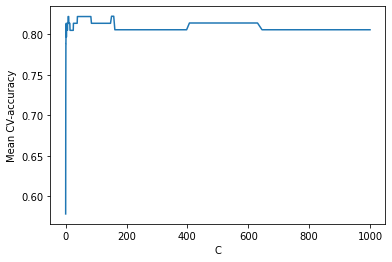

In [27]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy");

Выделим участок с "лучшими" значениями C.

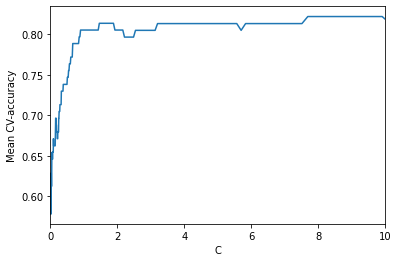

In [28]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy")
plt.xlim((0, 10));

# Кривые валидации и обучения 

Рассмотрим на примере уже раннее используемого датасета по телекоммуникационным услугам:

In [29]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv("/content/drive/MyDrive/telecom_churn.csv").drop("State", axis=1)
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})
data["Voice mail plan"] = data["Voice mail plan"].map({"Yes": 1, "No": 0})

y = data["Churn"].astype("int").values
X = data.drop("Churn", axis=1).values

In [32]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss="log", n_jobs=-1, random_state=17)
logit_pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("sgd_logit", sgd_logit),
    ]
)
val_train, val_test = validation_curve(
    logit_pipe, X, y, "sgd_logit__alpha", alphas, cv=3, scoring="roc_auc"
)

TypeError: ignored

In [ ]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )


plot_with_err(alphas, val_train, label="training scores")
plot_with_err(alphas, val_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("ROC AUC")
plt.legend();

Для простых моделей тренировочная и валидационная ошибка находятся где-то рядом, и они велики. Это говорит о том, что модель недообучилась: то есть она не имеет достаточное кол-во параметров.

Для сильно усложненных моделей тренировочная и валидационная ошибки значительно отличаются. Это можно объяснить переобучением: когда параметров слишком много либо не хватает регуляризации, алгоритм может "отвлекаться" на шум в данных и упускать основной тренд.

In [ ]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            ("sgd_logit", SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha)),
        ]
    )
    N_train, val_train, val_test = learning_curve(
        logit_pipe, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()

In [ ]:
plot_learning_curve(degree=2, alpha=10)

Типичная ситуация: для небольшого объема данных ошибки на обучающей выборке и в процессе кросс-валидации довольно сильно отличаются, что указывает на переобучение. Для той же модели, но с большим объемом данных ошибки "сходятся", что указывается на недообучение.

Если добавить еще данные, ошибка на обучающей выборке не будет расти, но с другой стороны, ошибка на тестовых данных не будет уменьшаться.

Получается, ошибки "сошлись", и добавление новых данных не поможет. Собственно, это случай – самый интересный для бизнеса. Возможна ситуация, когда мы увеличиваем выборку в 10 раз. Но если не менять сложность модели, это может и не помочь. То есть стратегия "настроил один раз – дальше использую 10 раз" может и не работать.

Что будет, если изменить коэффициент регуляризации? Видим хорошую тенденцию – кривые постепенно сходятся, и если дальше двигаться направо (добавлять в модель данные), можно еще повысить качество на валидации.

In [ ]:
plot_learning_curve(degree=2, alpha=0.05)

Попробуем еще: 

In [ ]:
plot_learning_curve(degree=2, alpha=1e-4)

Получили переобучение. 

**Выводы**

Ошибка на обучающей выборке сама по себе ничего не говорит о качестве модели.


Кросс-валидационная ошибка показывает, насколько хорошо модель подстраивается под данные (имеющийся тренд в данных), сохраняя при этом способность обобщения на новые данные.

Валидационная кривая представляют собой график, показывающий результат на тренировочной и валидационной выборке в зависимости от сложности модели:
если две кривые распологаются близко, и обе ошибки велики, - это признак недообучения.

Если две кривые далеко друг от друга, - это показатель переобучения
Кривая обучения - это график, показывающий результаты на валидации и тренировочной подвыборке в зависимости от количества наблюдений.
если кривые сошлись друг к другу, добавление новых данных не поможет – надо менять сложность модели.

Если кривые еще не сошлись, добавление новых данных может улучшить результат.